Задание 3
Из GitHub-репозитория (папка data) загрузите архив 03. kallisto hometask.tar.gz для шести дополнительных образцов, которые были в исследовании. Выполните анализ, аналогичный тому, что мы делали на занятии: посмотрите на дифференциально экспрессированные гены для (1) просто нокаутов по KEAP1 и для (2) нокаутов по обоим генам. Дифференциальную экспрессию рассчитывайте на уровне генов, а не транскриптов.

Являются ли дифференциально экспрессированные гены во втором случае объединением дифференциально экспрессированных генов по нокаутом KEAP1 и STK11? Почему?

In [17]:
import pandas as pd
sample_13 = pd.read_csv("abundance_13.tsv",sep="\t", index_col=0)
sample_14 = pd.read_csv("abundance_14.tsv",sep="\t", index_col=0)
sample_15 = pd.read_csv("abundance_15.tsv",sep="\t", index_col=0)
sample_16 = pd.read_csv("abundance_16.tsv",sep="\t", index_col=0)
sample_17 = pd.read_csv("abundance_17.tsv",sep="\t", index_col=0)
sample_18 = pd.read_csv("abundance_18.tsv",sep="\t", index_col=0)

In [23]:
sample_13_tpm = sample_13.tpm
sample_14_tpm = sample_14.tpm
sample_15_tpm = sample_15.tpm
sample_16_tpm = sample_16.tpm
sample_17_tpm = sample_17.tpm
sample_18_tpm = sample_18.tpm

In [96]:
sample_13

,length,eff_length,est_counts,tpm
target_id,,,,
ENST00000631435.1,12,3.5000,0.0,0.0
ENST00000434970.2,9,2.0000,0.0,0.0
ENST00000448914.1,13,4.5000,0.0,0.0
ENST00000415118.1,8,1.0000,0.0,0.0
ENST00000632684.1,12,3.5000,0.0,0.0
...,...,...,...,...
ENST00000639790.1,1370,1140.9100,0.0,0.0
ENST00000639660.1,284,99.6709,0.0,0.0
ENST00000643577.1,105,17.0099,0.0,0.0


In [28]:
print('sample_13_tpm \n' , sample_13_tpm)

sample_13_tpm 
 target_id
ENST00000631435.1    0.0
ENST00000434970.2    0.0
ENST00000448914.1    0.0
ENST00000415118.1    0.0
ENST00000632684.1    0.0
                    ... 
ENST00000639790.1    0.0
ENST00000639660.1    0.0
ENST00000643577.1    0.0
ENST00000646356.1    0.0
ENST00000645792.1    0.0
Name: tpm, Length: 188753, dtype: float64


In [32]:
expressions_counts = pd.concat([sample_13_tpm, sample_14_tpm, sample_15_tpm, sample_16_tpm, sample_17_tpm, sample_18_tpm], axis = 1)
expressions_counts.columns = ["sample_13", "sample_14", "sample_15", "sample_16", "sample_17", "sample_18"]

In [33]:
expressions_counts

,sample_13,sample_14,sample_15,sample_16,sample_17,sample_18
target_id,,,,,,
ENST00000631435.1,0.0,0.0,0.000000,0.0,0.000000,0.0
ENST00000434970.2,0.0,0.0,0.000000,0.0,0.000000,0.0
ENST00000448914.1,0.0,0.0,0.000000,0.0,0.000000,0.0
ENST00000415118.1,0.0,0.0,0.000000,0.0,0.000000,0.0
ENST00000632684.1,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...
ENST00000639790.1,0.0,0.0,0.000000,0.0,0.000000,0.0
ENST00000639660.1,0.0,0.0,0.000000,0.0,0.000000,0.0
ENST00000643577.1,0.0,0.0,0.000000,0.0,0.000000,0.0


Теперь посмотрим  на дифференциально экспрессированные гены для (1) просто нокаутов по KEAP1 и для (2) нокаутов по обоим генам.

In [44]:
pip install rpy2[all]

Note: you may need to restart the kernel to use updated packages.


In [46]:
import rpy2
from rpy2.robjects import r, pandas2ri

#%load_ext rpy2.ipython
pandas2ri.activate()

Анализ дифференциальной экспрессии при помощи DESeq2

In [49]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")

library("DESeq2")
library(ggplot2)

From cffi callback <function _consolewrite_ex at 0x000001CC0A0483A0>:
Traceback (most recent call last):
  File "C:\Users\ww\anaconda3\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 132, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "C:\Users\ww\anaconda3\lib\site-packages\rpy2\rinterface_lib\conversion.py", line 133, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).decode(encoding)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd3 in position 0: invalid continuation byte
From cffi callback <function _consolewrite_ex at 0x000001CC0A0483A0>:
Traceback (most recent call last):
  File "C:\Users\ww\anaconda3\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 132, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "C:\Users\ww\anaconda3\lib\site-packages\rpy2\rinterface_lib\conversion.py", line 133, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).dec

R[write to console]: trying URL 'https://cran.cmm.msu.ru/bin/windows/contrib/4.1/BiocManager_1.30.16.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 328790 bytes (321 KB)

R[write to console]: downloaded 321 KB




package 'BiocManager' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ww\AppData\Local\Temp\RtmpkF1bYX\downloaded_packages


R[write to console]: 'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.cmm.msu.ru


R[write to console]: Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

R[write to console]: Installing package(s) 'BiocVersion', 'DESeq2'

From cffi callback <function _consolewrite_ex at 0x000001CC0A0483A0>:
Traceback (most recent call last):
  File "C:\Users\ww\anaconda3\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 132, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "C:\Users\ww\anaconda3\lib\site-packages\rpy2\rinterface_lib\conversion.py", line 133, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).decode(encoding)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 0: invalid continuation byte
R[write to console]: trying URL 'https://cran.cmm.msu.ru/bin/windows/contrib/4.1/fastmap_1.1.0.zip'

R

package 'fastmap' successfully unpacked and MD5 sums checked
package 'sys' successfully unpacked and MD5 sums checked
package 'bit' successfully unpacked and MD5 sums checked
package 'cachem' successfully unpacked and MD5 sums checked
package 'askpass' successfully unpacked and MD5 sums checked
package 'bitops' successfully unpacked and MD5 sums checked
package 'formatR' successfully unpacked and MD5 sums checked
package 'bit64' successfully unpacked and MD5 sums checked
package 'blob' successfully unpacked and MD5 sums checked
package 'memoise' successfully unpacked and MD5 sums checked
package 'plogr' successfully unpacked and MD5 sums checked
package 'png' successfully unpacked and MD5 sums checked
package 'Biostrings' successfully unpacked and MD5 sums checked
package 'curl' successfully unpacked and MD5 sums checked
package 'jsonlite' successfully unpacked and MD5 sums checked
package 'mime' successfully unpacked and MD5 sums checked
package 'openssl' successfully unpacked and MD5

From cffi callback <function _consolewrite_ex at 0x000001CC0A0483A0>:
Traceback (most recent call last):
  File "C:\Users\ww\anaconda3\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 132, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "C:\Users\ww\anaconda3\lib\site-packages\rpy2\rinterface_lib\conversion.py", line 133, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).decode(encoding)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 0: invalid continuation byte
R[write to console]: trying URL 'https://bioconductor.org/packages/3.14/data/annotation/src/contrib/GenomeInfoDbData_1.2.7.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 11193674 bytes (10.7 MB)

R[write to console]: downloaded 10.7 MB


R[write to console]: 

R[write to console]: 
R[write to console]: The downloaded source packages are in
	'C:\Users\ww\AppData\Local\Temp\RtmpkF1bYX\downloaded_p

In [51]:
%%R
library("DESeq2")
library(ggplot2)

In [52]:
expr_matrix = expressions_counts.copy()
expr_matrix = expr_matrix.astype("int32")
expr_matrix.index.name = ""
gene_id = expr_matrix.index.copy()
%R -i expr_matrix
%R -i gene_id

In [53]:
%%R
rownames(expr_matrix) = make.names(gene_id, unique=TRUE)
head(expr_matrix)

                  sample_13 sample_14 sample_15 sample_16 sample_17 sample_18
ENST00000631435.1         0         0         0         0         0         0
ENST00000434970.2         0         0         0         0         0         0
ENST00000448914.1         0         0         0         0         0         0
ENST00000415118.1         0         0         0         0         0         0
ENST00000632684.1         0         0         0         0         0         0
ENST00000604446.1         0         0         0         0         0         0


In [72]:
%%R
condition <- c("STK11_del", "STK11_del","STK11_del", "KEAP1_del", "KEAP1_del", "KEAP1_del")
name <- c("sample_13", "sample_14", "sample_15", "sample_16", "sample_17", "sample_18")
colData <- data.frame(condition, name)
dds <- DESeqDataSetFromMatrix(expr_matrix, colData, design=~condition)
print(dds)

class: DESeqDataSet 
dim: 188753 6 
metadata(1): version
assays(1): counts
rownames(188753): ENST00000631435.1 ENST00000434970.2 ...
  ENST00000646356.1 ENST00000645792.1
rowData names(0):
colnames(6): sample_13 sample_14 ... sample_17 sample_18
colData names(2): condition name


In [73]:
%%R
dds <- DESeq(dds)

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



In [74]:
%%R
print(dds)

class: DESeqDataSet 
dim: 188753 6 
metadata(1): version
assays(4): counts mu H cooks
rownames(188753): ENST00000631435.1 ENST00000434970.2 ...
  ENST00000646356.1 ENST00000645792.1
rowData names(22): baseMean baseVar ... deviance maxCooks
colnames(6): sample_13 sample_14 ... sample_17 sample_18
colData names(3): condition name sizeFactor


In [75]:
%%R
res <- results(dds)
head(results(dds))

log2 fold change (MLE): condition STK11 del vs KEAP1 del 
Wald test p-value: condition STK11 del vs KEAP1 del 
DataFrame with 6 rows and 6 columns
                   baseMean log2FoldChange     lfcSE      stat    pvalue
                  <numeric>      <numeric> <numeric> <numeric> <numeric>
ENST00000631435.1         0             NA        NA        NA        NA
ENST00000434970.2         0             NA        NA        NA        NA
ENST00000448914.1         0             NA        NA        NA        NA
ENST00000415118.1         0             NA        NA        NA        NA
ENST00000632684.1         0             NA        NA        NA        NA
ENST00000604446.1         0             NA        NA        NA        NA
                       padj
                  <numeric>
ENST00000631435.1        NA
ENST00000434970.2        NA
ENST00000448914.1        NA
ENST00000415118.1        NA
ENST00000632684.1        NA
ENST00000604446.1        NA


In [77]:
%%R
res <- res[order(res$padj),]
head(res)

log2 fold change (MLE): condition STK11 del vs KEAP1 del 
Wald test p-value: condition STK11 del vs KEAP1 del 
DataFrame with 6 rows and 6 columns
                   baseMean log2FoldChange     lfcSE      stat      pvalue
                  <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENST00000374561.6   125.710        5.61379  0.419271   13.3894 6.97481e-41
ENST00000634790.2   125.710        5.61379  0.419271   13.3894 6.97481e-41
ENST00000359579.5   366.626        4.56650  0.368356   12.3970 2.71445e-35
ENST00000228945.9   111.343       -4.45102  0.359091  -12.3953 2.77255e-35
ENST00000338380.2   169.484        5.19226  0.429834   12.0797 1.35222e-33
ENST00000261622.5   738.667        2.41711  0.201930   11.9701 5.09967e-33
                         padj
                    <numeric>
ENST00000374561.6 6.69582e-37
ENST00000634790.2 6.69582e-37
ENST00000359579.5 1.33082e-31
ENST00000228945.9 1.33082e-31
ENST00000338380.2 5.19252e-30
ENST00000261622.5 1.63190e-29


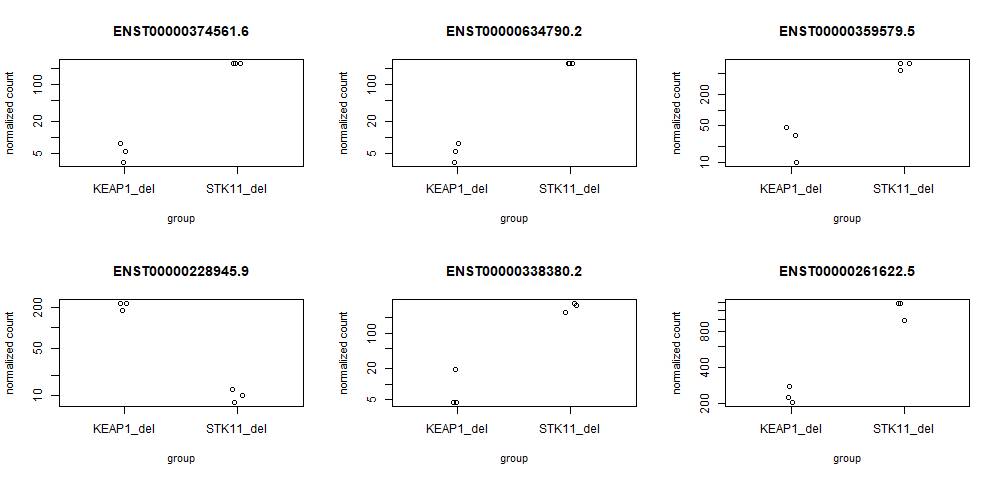

In [78]:
%%R -w 1000
#Задаём размер текста и композицию графика
par(mfrow=c(2,3), cex=1.0, cex.main=1.2, cex.axis=1, cex.lab=0.9)

plotCounts(dds, gene="ENST00000374561.6", intgroup="condition")
plotCounts(dds, gene="ENST00000634790.2", intgroup="condition")
plotCounts(dds, gene="ENST00000359579.5", intgroup="condition")
plotCounts(dds, gene="ENST00000228945.9", intgroup="condition")
plotCounts(dds, gene="ENST00000338380.2", intgroup="condition")
plotCounts(dds, gene="ENST00000261622.5", intgroup="condition")

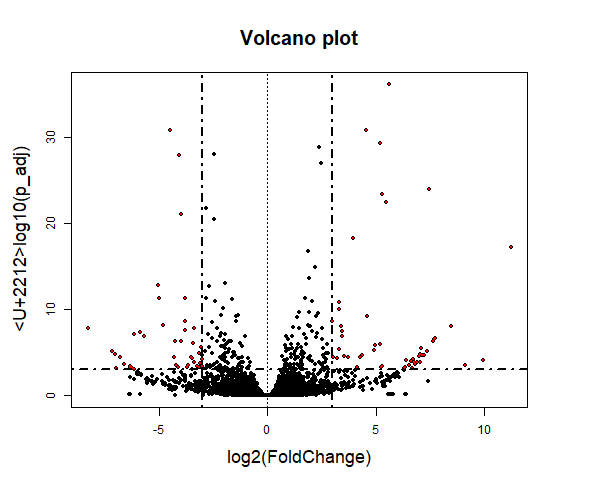

In [79]:
%%R -w 600

#Задаём размер текста и композицию графика
par(mar=c(5,5,5,5), cex=1.0, cex.main=1.7, cex.axis=1, cex.lab=1.5)

#Отрисовываем все точки чёрным цветом
with(res, plot(log2FoldChange, -log10(padj), pch=20, main="Volcano plot", cex=1.0, xlab="log2(FoldChange)", ylab="−log10(p_adj)"))

#Отрисовываем точки, прошедшие порог, красным цветом
with(subset(res, padj<0.001 & abs(log2FoldChange)>3), points(log2FoldChange, -log10(padj), pch=20, col="red", cex=0.5))

#Отрисовываем линии с порогами
abline(v=0, col="black", lty=3, lwd=1.0)
abline(v=-3, col="black", lty=4, lwd=2.0)
abline(v=3, col="black", lty=4, lwd=2.0)
abline(h=3, col="black", lty=4, lwd=2.0)

4 задание 

In [134]:
sample = pd.concat([sample_13, sample_14, sample_15, sample_16, sample_17, sample_18])

In [136]:
from sklearn.preprocessing import StandardScaler
features = ["length", "eff_length", "est_counts", "tpm"]# Separating out the features
x = sample.loc[:, features].values # Separating out the target
#y = sample.loc[:,['target_id']].values # Standardizing the features
x = StandardScaler().fit_transform(x)

In [137]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [138]:
finalDf = pd.concat([principalDf], axis = 1)

In [139]:
finalDf

,principal component 1,principal component 2
0,-1.134341,0.150093
1,-1.135945,0.150468
2,-1.133628,0.149926
3,-1.136658,0.150635
4,-1.134341,0.150093
...,...,...
1132513,-0.245500,-0.057968
1132514,-1.000683,0.118809
1132515,-1.096389,0.141210
1132516,-0.580651,0.020486


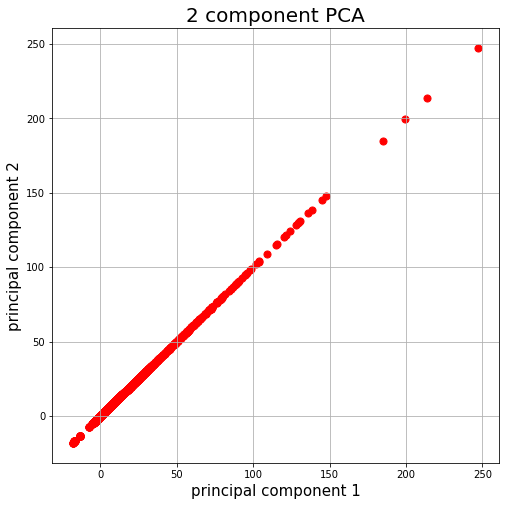

In [140]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('principal component 1', fontsize = 15)
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
#for  color in zip(colors):
    #indicesToKeep = finalDf['target'] == target
ax.scatter(finalDf.loc[:'principal component 1'], finalDf.loc[:'principal component 2'], c = color, s = 50)
#ax.legend(targets)
ax.grid()